# Classification model using Logistic Regression

### 1. Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload RNA data

In [17]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_2776_genes_839_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,ABCB1,ABCB6,ABCG2,ABL2,ACADM,ACD,ACE,ACE2,ACHE,...,XRCC6,YAP1,YBX1,YBX3,YY1,ZBTB17,ZHX2,ZMIZ1,ZMPSTE24,Y
0,0,36.716012,33.867624,29.676682,32.862716,35.061520,31.801427,31.988036,30.172489,29.912204,...,35.24634,33.97677,37.51551,35.75761,33.53412,31.72285,33.23150,32.38760,32.22373,1
1,1,34.174577,32.703008,31.318871,33.061603,35.908450,31.878071,33.015718,33.634947,26.076400,...,35.91455,34.75610,36.67356,35.85355,34.44291,31.63512,32.63491,33.78434,32.19111,1
2,2,31.225510,34.522351,30.612181,32.658413,34.370223,31.425178,31.714695,26.858096,27.589284,...,36.05801,34.48484,36.41164,35.24518,35.14050,31.99899,34.31359,32.95630,32.77568,1
3,3,32.988641,33.059035,31.973489,33.014431,35.824161,31.829645,32.916062,29.565514,28.143610,...,35.75676,35.27953,36.58061,36.19379,34.96911,31.28469,33.03073,33.88207,32.46805,0
4,4,33.284849,31.488348,30.774368,33.793065,34.332987,32.020127,31.824945,28.767942,26.537023,...,36.33015,34.50745,36.89459,34.95292,34.76483,33.40109,32.15993,33.35772,31.64157,1


In [18]:
X = data.iloc[:,1:839  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

         ABCB1      ABCB6      ABCG2       ABL2      ACADM        ACD  \
0    36.716012  33.867624  29.676682  32.862716  35.061520  31.801427   
1    34.174577  32.703008  31.318871  33.061603  35.908450  31.878071   
2    31.225510  34.522351  30.612181  32.658413  34.370223  31.425178   
3    32.988641  33.059035  31.973489  33.014431  35.824161  31.829645   
4    33.284849  31.488348  30.774368  33.793065  34.332987  32.020127   
..         ...        ...        ...        ...        ...        ...   
176  33.838323  32.296025  30.740420  33.040376  34.981970  31.823358   
177  31.895951  33.784466  29.347511  31.571621  34.865097  29.786302   
178  33.842290  32.838072  29.862937  33.491465  34.379400  31.246333   
179  34.715293  32.561403  29.292590  33.151894  34.802123  32.344355   
180  32.476530  32.316413  26.957145  33.580139  34.950670  32.959610   

           ACE       ACE2       ACHE       ACO2  ...     XRCC4     XRCC6  \
0    31.988036  30.172489  29.912204  35.812113

### 3. Train-Test dataset split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_test))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [20]:
param_grid = {'C': [1,2,5,7,10],
            'solver': ['newton-cg','liblinear'], 
            'max_iter':[25,50,100,200,500,1000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\Users\sandr\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algo

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10],
                         'max_iter': [25, 50, 100, 200, 500, 1000],
                         'random_state': [125],
                         'solver': ['newton-cg', 'liblinear']})

In [21]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


c:\Users\sandr\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\sandr\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(C=1, max_iter=50, random_state=125, solver='newton-cg')

In [22]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.48571428571428565


### 5. Prediction

In [23]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [24]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [25]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset: 1.0
Final accuracy on the testing dataset: 0.5945945945945946


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[68  0]
 [ 0 76]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [27]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        76

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 7 10]
 [ 5 15]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0]


In [29]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.58      0.41      0.48        17
           1       0.60      0.75      0.67        20

    accuracy                           0.59        37
   macro avg       0.59      0.58      0.57        37
weighted avg       0.59      0.59      0.58        37



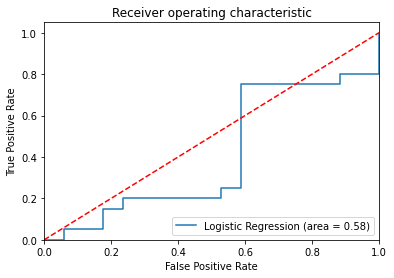

In [30]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()